Mod 7 Project

In [1]:
import pandas as pd


In [2]:
nyc=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [5]:
nyc.columns = ['Date', 'Temperature', 'Anomaly'] #Clarity added to what "Value" is

In [6]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [7]:
nyc.Date= nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [8]:
pd.set_option('display.precision', 2) #Cleaning up to reduce trailing 0s

In [9]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [10]:
nyc.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


In [11]:
from scipy import stats

In [12]:
linear_regression = stats.linregress(x=nyc.Date, 
                                        y=nyc.Temperature)

In [13]:
linear_regression.slope

0.014771361132966163

In [14]:
linear_regression.intercept

8.694993233674289

In [ ]:
# Y= (0.014771361132966163)X + (8.694993233674289)

In [15]:
linear_regression.slope * 2019 +linear_regression.intercept

38.51837136113297

In [16]:
linear_regression.slope * 1890 +linear_regression.intercept

36.612865774980335

In [17]:
linear_regression.slope * 3000 +linear_regression.intercept

53.00907663257278

In [18]:
X=linear_regression.slope * 2021 +linear_regression.intercept #assigned value to get temperature into fahrenheit

In [19]:
round(X, 2) #assigned value to get temp in fahrenheit

38.55

In [20]:
round(((X * 1.8) + 32), 2) #predicted jan 2021 max temp jan nyc in fahrenheit

101.39

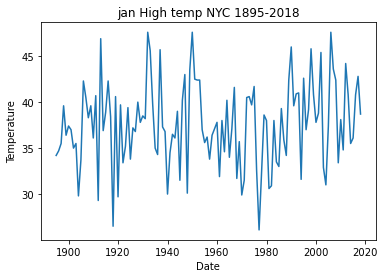

In [21]:
import matplotlib.pyplot as plt

plt.plot(nyc.Date,nyc.Temperature)
plt.title('jan High temp NYC 1895-2018')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

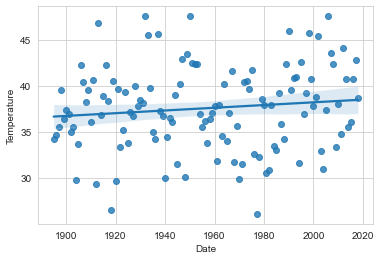

In [22]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

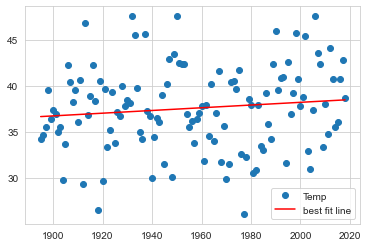

In [25]:
plt.plot(nyc.Date,nyc.Temperature, 'o', label='Temp')
plt.plot(nyc.Date, linear_regression.intercept + linear_regression.slope*nyc.Date, 'r', label='best fit line')
plt.legend()
plt.show()

In [ ]:
print(f"R-squared: {linear_regression.rvalue**2:.6f}")

In [ ]:
#Mike Abbinante